In [15]:
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

if ret:
    cv2.imwrite("face.jpg", frame)
    print("Image captured and saved as face.jpg")
else:
    print("Failed to capture image")

cap.release()
cv2.destroyAllWindows()


Image captured and saved as face.jpg


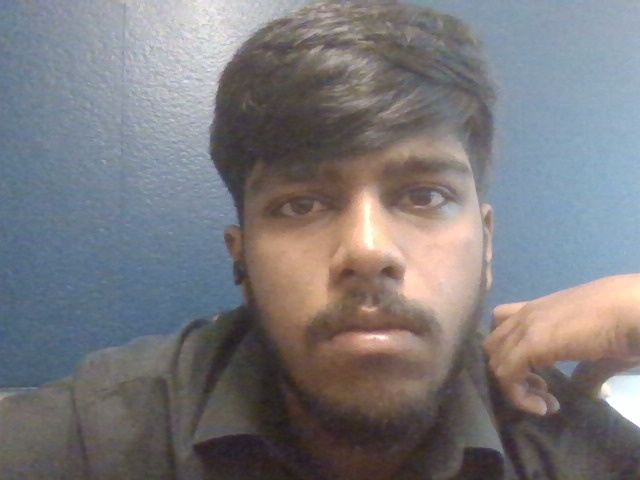

In [16]:
from IPython.display import Image, display

display(Image(filename="face.jpg"))


In [17]:
import base64

with open('face.jpg', 'rb') as img_file:
    img_bytes = img_file.read()
    encoded_image = base64.b64encode(img_bytes).decode('utf-8')

print("Image successfully encoded.")


Image successfully encoded.


In [20]:
import requests

model_name = "qwen2.5vl:latest"  

prompt = "Evaluate the confidence level of the person based on their facial expression and return the output as only one label out of the following three: Low Confidence, Moderately Confident, Highly Confident."

response = requests.post(
    'http://localhost:11434/api/generate',
    json={
        "model": model_name,
        "prompt": prompt,
        "images": [encoded_image],
        "stream": False 
    }
)

response_json = response.json()
print("Model response:\n")
print(response_json["response"])


Model response:

Moderately Confident
